# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

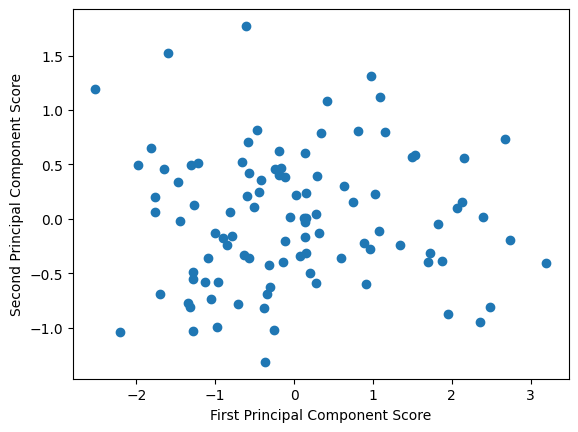

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [7]:
import zipfile
import os


In [8]:
# Extract files and using "cca" to distinct from other datasets 
zip_file_path_cca = "cc_approval.zip"  
extracted_dir_cca = "extracted_data_cca"

os.makedirs(extracted_dir_cca, exist_ok=True)

try:
    with zipfile.ZipFile(zip_file_path_cca, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir_cca)
    print(f"Successfully unzipped '{zip_file_path_cca}' to '{extracted_dir_cca}'")

    # List contents
    print(f"\nContents of '{extracted_dir_cca}':")
    for item in os.listdir(extracted_dir_cca):
        print(f"- {item}")

except FileNotFoundError:
    print(f"Error: The file '{zip_file_path_cca}' was not found. Check the path.")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path_cca}' is not a valid ZIP file or is corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully unzipped 'cc_approval.zip' to 'extracted_data_cca'

Contents of 'extracted_data_cca':
- Application_Data.csv


In [9]:
csv_file_name_cca = "Application_Data.csv"
full_csv_path_cca = os.path.join(extracted_dir_cca, csv_file_name_cca)

df_cca =pd.read_csv(full_csv_path_cca)

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
try:
    potential_numerical_features = [
        'Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Months_Employed',
        'Debt_To_Income_Ratio', 'Num_Dependents', 'Years_at_Current_Address',
        'Credit_History_Length_Years', 'Approved_Amount' # Or whatever your target variable might be
    ]
    
    numerical_features = [col for col in potential_numerical_features if col in df_cca.columns]

    if not numerical_features:
        # Fallback if none of the common ones exist, take first few numeric columns
        numerical_features = df_cca.select_dtypes(include=np.number).columns.tolist()
        print(f"\nNo common credit application features found. Using all numerical columns: {numerical_features}")
    else:
        print(f"\nSelected numerical features for analysis: {numerical_features}")
    df_analysis = df_cca[numerical_features].dropna()
    if df_analysis.empty:
        print("\nWARNING: df_analysis is empty after dropping NaNs. Check your data or handle missing values differently.")
except KeyError:
    print("\nERROR: The assumed numerical features for 'Application_Data.csv' do not exist.")
    print("Please inspect df_cca.head(), df_cca.info(), and df_cca.describe() AFTER LOADING YOUR DATA to choose appropriate numerical column names for 'numerical_features' list.")
    # As a fallback, try to get *any* numerical columns if specific ones fail
    if not numerical_features:
        print("\nNo numerical columns found in the DataFrame. Cannot proceed with numerical analysis.")
        exit() # Cannot proceed without numerical data
    else:
        print(f"\nUsing all available numerical columns due to KeyError: {numerical_features}")
        df_analysis = df_cca[numerical_features].dropna()
        if df_analysis.empty:
            print("\nWARNING: df_analysis is empty after dropping NaNs for all numerical columns. Check your data or handle missing values differently.")
            exit()

print(f"\nDataFrame for analysis shape after handling NaNs: {df_analysis.shape}")
print(f"Number of features for PCA/regression: {len(numerical_features)}")
if len(numerical_features) < 2:
    print("WARNING: Not enough numerical features (need at least 2) for meaningful correlation, PCA, or regression analysis.")
    exit()


No common credit application features found. Using all numerical columns: ['Applicant_ID', 'Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income', 'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt', 'Status']

DataFrame for analysis shape after handling NaNs: (25128, 15)
Number of features for PCA/regression: 15


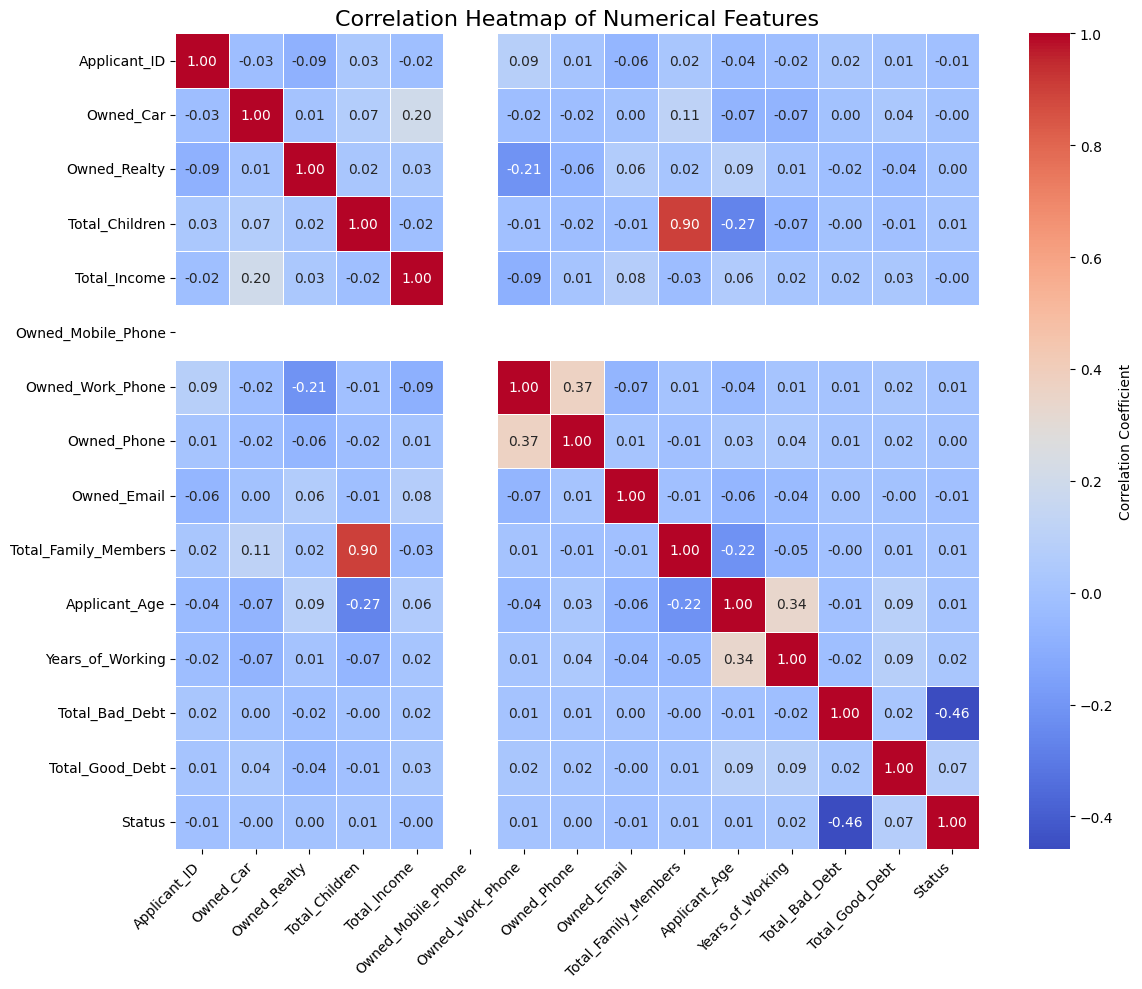

In [10]:
correlation_matrix = df_analysis.corr()

plt.figure(figsize=(min(12, len(numerical_features)*1.2), min(10, len(numerical_features)*1.2))) # Dynamic sizing
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

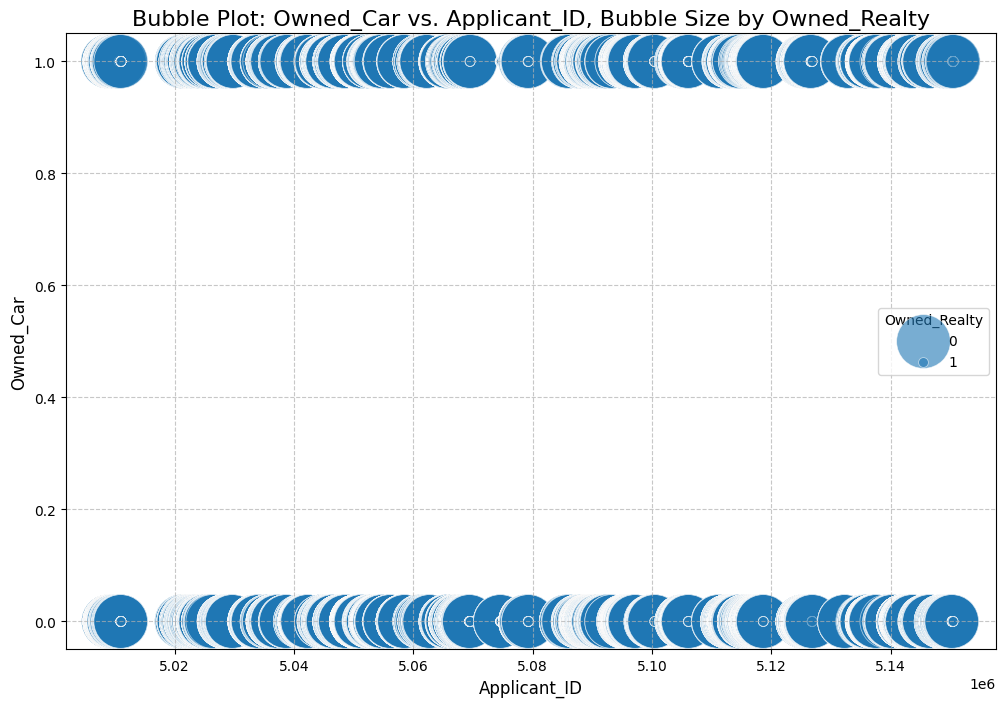


Bubble Plot Interpretation:
This bubble plot visualizes the relationship among Applicant_ID (x-axis), Owned_Car (y-axis), and Owned_Realty (bubble size).
Observe if there's a visible trend for the bubble sizes. For instance:
- Do larger bubbles (representing higher values of {bubble_size}) tend to cluster in specific regions (e.g., higher values of {bubble_x} and {bubble_y})?
- Are bubble sizes randomly distributed, suggesting little correlation between {bubble_size} and the relationship of {bubble_x} and {bubble_y}?
This plot helps in identifying multivariate relationships that are harder to see in 2D scatter plots or heatmaps alone.


In [ ]:
if len(numerical_features) < 3:
    print("Skipping Bubble Plot: Not enough numerical features (need at least 3).")
else:

    bubble_features = []
    if 'Income' in numerical_features and 'Approved_Amount' in numerical_features and 'Credit_Score' in numerical_features:
        bubble_features = ['Income', 'Approved_Amount', 'Credit_Score']
    elif 'Age' in numerical_features and 'Debt_To_Income_Ratio' in numerical_features and 'Credit_Score' in numerical_features:
        bubble_features = ['Age', 'Debt_To_Income_Ratio', 'Credit_Score']
    elif len(numerical_features) >= 3:
        bubble_features = numerical_features[:3] # Fallback to first three available

    if len(bubble_features) == 3:
        bubble_x, bubble_y, bubble_size = bubble_features

        plt.figure(figsize=(12, 8))
        sns.scatterplot(
            data=df_analysis,
            x=bubble_x,
            y=bubble_y,
            size=bubble_size,
            sizes=(50, 1500), # Adjust min/max size for better visual distinction
            alpha=0.6,
            legend='brief' # To keep the legend concise
        )
        plt.title(f'Bubble Plot: {bubble_y} vs. {bubble_x}, Bubble Size by {bubble_size}', fontsize=16)
        plt.xlabel(f'{bubble_x}', fontsize=12)
        plt.ylabel(f'{bubble_y}', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

        print("\nBubble Plot Interpretation:")
        print(f"This bubble plot visualizes the relationship among {bubble_x} (x-axis), {bubble_y} (y-axis), and {bubble_size} (bubble size).")
        print("Observe if there's a visible trend for the bubble sizes. For instance:")
        print("- Do larger bubbles (representing higher values of {bubble_size}) tend to cluster in specific regions (e.g., higher values of {bubble_x} and {bubble_y})?")
        print("- Are bubble sizes randomly distributed, suggesting little correlation between {bubble_size} and the relationship of {bubble_x} and {bubble_y}?")
        print("This plot helps in identifying multivariate relationships that are harder to see in 2D scatter plots or heatmaps alone.")
    else:
        print("Could not find 3 suitable features for a bubble plot or there aren't enough numerical features.")



--- Principal Component Analysis (PCA) ---

Principal Components (first 5 rows) for ['Applicant_ID', 'Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income', 'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt', 'Status']:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.095668 -1.496244  0.224178  0.531791  0.059788  0.128818 -0.279855   
1 -2.000600 -1.011052 -0.033665 -0.160301  0.922670  3.551234  0.365180   
2 -2.000599 -1.011047 -0.033665 -0.160302  0.922668  3.551222  0.365182   
3 -2.062272 -0.950216  0.153867  0.344706  1.187055  3.178706  1.424054   
4 -2.095911 -0.917032  0.256157  0.620165  1.331265  2.975511  2.001621   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.820533  0.782274  0.940622  1.536096  0.129357 -0.071283 -0.103876   
1  0.839611 -0.895716 -0.189254  0.767487 -0.670893 

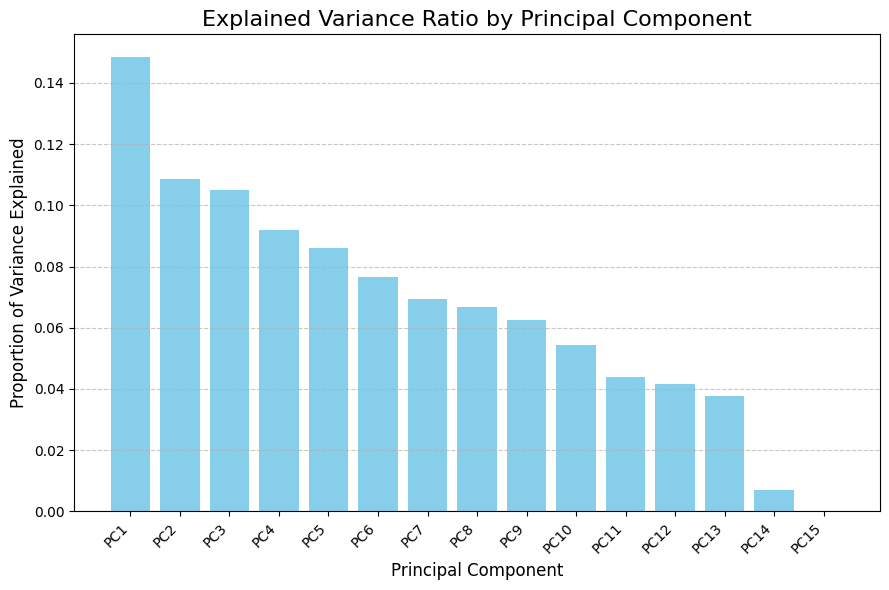


--- Challenge Question: Explain why the principal component vectors point as they do ---
To explain the direction of the component vectors (loadings), you must refer back to your correlation heatmap and your understanding of the features:
- **PC1 (First Principal Component):** This component captures the *most* variance in your data. Its direction (the signs and magnitudes of its loadings) will generally align with the strongest correlations among your features. For example, if 'Credit_Score' and 'Approved_Amount' are highly positively correlated, PC1 will likely have large positive loadings for both, representing a general 'creditworthiness' or 'application strength' dimension.
- **Subsequent Principal Components (PC2, PC3, etc.):** Each subsequent component captures the maximum remaining variance while being orthogonal (uncorrelated) to the previous components. These often represent more subtle variations or dimensions that are independent of the primary drivers. For example, if a f

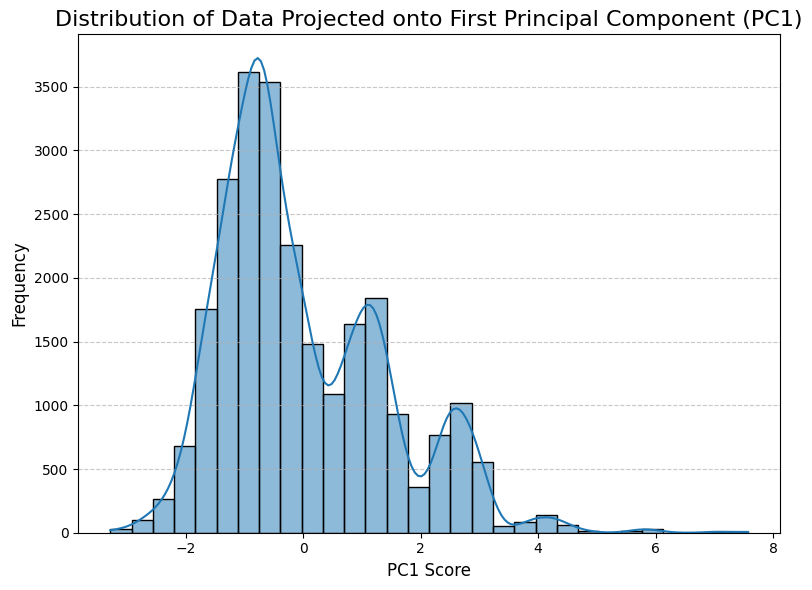

In [14]:
print("\n--- Principal Component Analysis (PCA) ---")

if len(numerical_features) < 2:
    print("Skipping PCA: Not enough numerical features (need at least 2).")
else:
    # 1. Standardize the Data for PCA
    # PCA is sensitive to scale, so we must standardize.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_analysis[numerical_features])
    df_scaled_pca = pd.DataFrame(X_scaled, columns=numerical_features)

    # 2. Perform PCA
    # n_components=len(numerical_features) to get all possible components
    pca = PCA(n_components=len(numerical_features))
    principal_components = pca.fit_transform(X_scaled)

    # Create a DataFrame for the principal components
    pca_columns = [f'PC{i+1}' for i in range(len(numerical_features))]
    df_pca = pd.DataFrame(data=principal_components, columns=pca_columns)

    print(f"\nPrincipal Components (first 5 rows) for {numerical_features}:\n", df_pca.head())

    # 3. Get the Component Vectors (Loadings)
    component_vectors = pca.components_
    print("\nPrincipal Component Vectors (Loadings):")
    # Each row is a component vector, columns correspond to original features
    print(pd.DataFrame(component_vectors, columns=numerical_features, index=pca_columns))

    # 4. Explained Variance Ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for each component:")
    for i, ratio in enumerate(explained_variance_ratio):
        print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
    print(f"Total variance explained by all components: {explained_variance_ratio.sum():.2f}")

    # Visualization of Explained Variance
    plt.figure(figsize=(9, 6))
    plt.bar(pca_columns, explained_variance_ratio, color='skyblue')
    plt.xlabel('Principal Component', fontsize=12)
    plt.ylabel('Proportion of Variance Explained', fontsize=12)
    plt.title('Explained Variance Ratio by Principal Component', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\n--- Challenge Question: Explain why the principal component vectors point as they do ---")
    print("To explain the direction of the component vectors (loadings), you must refer back to your correlation heatmap and your understanding of the features:")
    print("- **PC1 (First Principal Component):** This component captures the *most* variance in your data. Its direction (the signs and magnitudes of its loadings) will generally align with the strongest correlations among your features. For example, if 'Credit_Score' and 'Approved_Amount' are highly positively correlated, PC1 will likely have large positive loadings for both, representing a general 'creditworthiness' or 'application strength' dimension.")
    print("- **Subsequent Principal Components (PC2, PC3, etc.):** Each subsequent component captures the maximum remaining variance while being orthogonal (uncorrelated) to the previous components. These often represent more subtle variations or dimensions that are independent of the primary drivers. For example, if a feature like 'Num_Dependents' is relatively uncorrelated with other financial metrics, a later PC might primarily load on 'Num_Dependents', representing an independent demographic dimension.")
    print("Think about which groups of features tend to move together (high correlation) and which vary independently (low correlation) – this will guide your interpretation of the component directions.")

    # Representing data using only its projection onto its first principal component
    print("\n--- Projecting Data onto First Principal Component ---")

    if len(principal_components) > 0:
        # The scores of the first principal component are already in df_pca['PC1']
        projected_data_pc1 = df_pca['PC1']

        print(f"\nFirst 10 data points projected onto PC1:\n{projected_data_pc1.head(10).to_string()}")

        # How much variance would this capture?
        variance_captured_by_pc1 = explained_variance_ratio[0]
        print(f"\nVariance captured by projecting onto PC1: {variance_captured_by_pc1:.4f} ({variance_captured_by_pc1*100:.2f}%)")

        # Visualize the projected data (a histogram is often good for a single dimension)
        plt.figure(figsize=(8, 6))
        sns.histplot(projected_data_pc1, kde=True, bins=30)
        plt.title('Distribution of Data Projected onto First Principal Component (PC1)', fontsize=16)
        plt.xlabel('PC1 Score', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("No principal components to project as there's no data or too few features.")

In [16]:
print("\n--- Linear Regression Analysis ---")

if len(numerical_features) < 2:
    print("Skipping Linear Regression: Not enough numerical features (need at least 2).")
else:
    r2_scores = {}

    for i, target_feature in enumerate(numerical_features):
        predictor_features = [f for f in numerical_features if f != target_feature]

        if not predictor_features: # Should not happen if len(numerical_features) >= 2
            print(f"\nSkipping regression for {target_feature}: No predictor features available.")
            continue

        print(f"\nPredicting '{target_feature}' from {predictor_features}:")
        X = df_analysis[predictor_features]
        y = df_analysis[target_feature]

        model = LinearRegression()
        model.fit(X, y)
        r2 = model.score(X, y) # R-squared on training data

        r2_scores[target_feature] = r2

        print(f"  Coefficients: {model.coef_}")
        print(f"  Intercept: {model.intercept_:.4f}")
        print(f"  R-squared: {r2:.4f}")

    print("\n--- Summary of R-squared Values ---")
    for target, score in r2_scores.items():
        print(f"  Predicting '{target}' R-squared: {score:.4f}")

    best_prediction = max(r2_scores, key=r2_scores.get)
    print(f"\n**Prediction(s) that work best:** Predicting '{best_prediction}' has the highest R-squared of {r2_scores[best_prediction]:.4f}.")

    print("\n--- Why certain predictions work best? ---")
    print("Linear regression works best when there is a strong *linear correlation* between the target variable and one or more of the predictor variables.")
    print("Refer to your **Correlation Heatmap**:")
    print("- **High R-squared values** typically correspond to models where the target variable had strong positive or negative correlations with one or more of its predictor features. The regression model can effectively leverage these relationships.")
    print("  For example, if 'Credit_Score' is highly correlated with 'Approved_Amount', predicting 'Approved_Amount' using 'Credit_Score' (and other features) will likely result in a high R-squared.")
    print("- **Low R-squared values** indicate that the target variable is not well-explained by the linear combination of its predictors. This usually happens when there are weak or no linear correlations between the target and its predictors.")
    print("  For instance, if 'Age' and 'Loan_Amount' are largely independent in your data, predicting 'Age' from 'Loan_Amount' (and other uncorrelated features) would yield a low R-squared.")
    print("The 'best' predictions are those where the linear model captures a large proportion of the variance in the target variable, which is a direct consequence of strong correlations with the input features.")


--- Linear Regression Analysis ---

Predicting 'Applicant_ID' from ['Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income', 'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt', 'Status']:
  Coefficients: [-2.36626516e+03 -5.81316291e+03  2.54719274e+03  3.21763607e-04
  1.02318154e-12  7.08754299e+03 -1.60190458e+03 -7.69777289e+03
 -8.74275116e+02 -8.89238473e+01 -1.16571041e+02  4.40525969e+02
  3.61234253e+01 -3.24772463e+03]
  Intercept: 5090445.9003
  R-squared: 0.0189

Predicting 'Owned_Car' from ['Applicant_ID', 'Owned_Realty', 'Total_Children', 'Total_Income', 'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt', 'Status']:
  Coefficients: [-3.09992629e-07  1.55186732e-03 -1.33714286e-01  9.77458816e-07
 -8.02309608e-17 -1.52459710e-03 -2.60

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

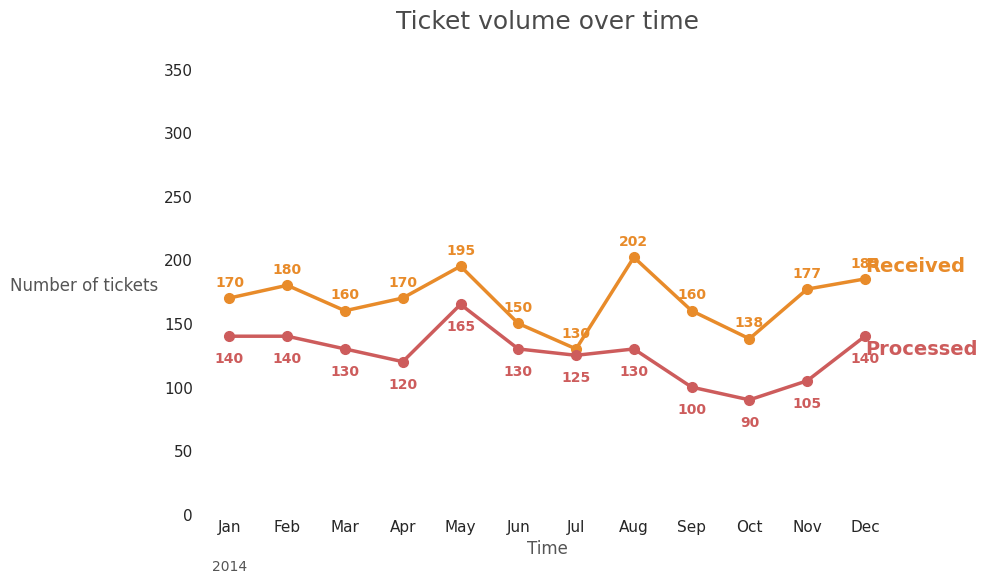

In [17]:

# Data approximation from the image
# Month names for x-axis labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Approximated data values for "Received" and "Processed"
received_data = [170, 180, 160, 170, 195, 150, 130, 202, 160, 138, 177, 185]
processed_data = [140, 140, 130, 120, 165, 130, 125, 130, 100, 90, 105, 140]

# Create a DataFrame
df = pd.DataFrame({
    'Month': months,
    'Received': received_data,
    'Processed': processed_data
})

# Convert 'Month' to a categorical type with specific order for correct plotting
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

plt.style.use('seaborn-v0_8-whitegrid') 
sns.set_context("notebook", font_scale=1.0) 
fig, ax = plt.subplots(figsize=(10, 6)) 

received_color = '#E88B2A' # Orange
processed_color = '#4E6BA6' # Darker Blue (approximated)
processed_color = '#CD5C5C' # A softer red/pinkish tone for processed

# Plot the "Received" line
ax.plot(df['Month'], df['Received'], marker='o', color=received_color, linewidth=2.5, markersize=7, zorder=3)
# Plot the "Processed" line
ax.plot(df['Month'], df['Processed'], marker='o', color=processed_color, linewidth=2.5, markersize=7, zorder=3)

# Add data labels for "Received" line
for i, txt in enumerate(df['Received']):
    ax.text(df['Month'][i], df['Received'][i] + 7, txt, ha='center', va='bottom',
            fontsize=10, color=received_color, fontweight='bold')

# Add data labels for "Processed" line
for i, txt in enumerate(df['Processed']):
    ax.text(df['Month'][i], df['Processed'][i] - 12, txt, ha='center', va='top',
            fontsize=10, color=processed_color, fontweight='bold')

# Customize the y-axis
ax.set_ylim(0, 360) # Set limits based on the original plot's visible range
ax.set_yticks(range(0, 361, 50)) # Set major ticks at 50 intervals
ax.tick_params(axis='y', length=0) # Remove y-axis ticks
ax.set_ylabel('Number of tickets', rotation=0, ha='right', va='center', fontsize=12, color='#555555') 
ax.set_xlabel('Time', fontsize=12, color='#555555')
# Add "2014" below "Jan"
ax.text(0, -35, '2014', ha='center', va='top', fontsize=10, color='#555555')
ax.set_title('Ticket volume over time', loc='center', fontsize=18, fontweight='normal', color='#4A4A4A', pad=20) 
sns.despine(left=True, bottom=True) # Remove left and bottom spines
ax.grid(False) # Remove grid lines completely
ax.tick_params(axis='x', length=0) # Remove x-axis ticks
ax.text(df['Month'].iloc[-1], df['Received'].iloc[-1] + 10, 'Received',
        color=received_color, fontsize=14, fontweight='bold', ha='left', va='center')
ax.text(df['Month'].iloc[-1], df['Processed'].iloc[-1] - 10, 'Processed',
        color=processed_color, fontsize=14, fontweight='bold', ha='left', va='center')
plt.tight_layout()
plt.show()